# Task 4.10 Part 1 Further Analysis

This script contains the following points:

    01. Improting Libraries
    02. Importing CSV/PKL files
    03. Work for Task Part 1
    04. Exporting files and visuals  

## 01. Importing Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing CSV/PKL files

In [2]:
# Identifying pathway for import for ease with multiple imports
path = r'C:\Users\Chris Arnold\Documents\Instacart Basket Analysis'

In [3]:
# Importing orders_products__customers_merged.pkl
df_complete = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

## 03. Work for task part 1

### Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
# looking at the head to determing if there is and PII data to remove
df_complete.head()

,User_ID,First_Name,Last_Name,Gender,State,Age,Date_Joined,Number_of_Dependants,Family_Status,Income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,Total_spent,Mean_prices,Spender_type,Median_days_since_prior_order,Customer_frequency
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Average Orders,8,New customer,12.6,7.988889,Low_spender,19.0,Regular_customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most Orders,8,New customer,12.6,7.988889,Low_spender,19.0,Regular_customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most Orders,8,New customer,12.6,7.988889,Low_spender,19.0,Regular_customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Average Orders,8,New customer,12.6,7.988889,Low_spender,19.0,Regular_customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Slowest days,Most Orders,8,New customer,12.6,7.988889,Low_spender,19.0,Regular_customer


The First_Name and Last_Name columns should be removed as they allow for actual identification of the customer.

In [5]:
# Removing First_Name and Last_Name columns
df_complete = df_complete.drop(columns = ['First_Name'])

In [6]:
# Removing First_Name and Last_Name columns
df_complete = df_complete.drop(columns = ['Last_Name'])

In [7]:
# Checking work
df_complete.head()

,User_ID,Gender,State,Age,Date_Joined,Number_of_Dependants,Family_Status,Income,order_id,eval_set,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,Total_spent,Mean_prices,Spender_type,Median_days_since_prior_order,Customer_frequency
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,Regularly busy,Regularly busy,Average Orders,8,New customer,12.6,7.988889,Low_spender,19.0,Regular_customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Regularly busy,Regularly busy,Most Orders,8,New customer,12.6,7.988889,Low_spender,19.0,Regular_customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,Regularly busy,Regularly busy,Most Orders,8,New customer,12.6,7.988889,Low_spender,19.0,Regular_customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,Regularly busy,Regularly busy,Average Orders,8,New customer,12.6,7.988889,Low_spender,19.0,Regular_customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,Regularly busy,Slowest days,Most Orders,8,New customer,12.6,7.988889,Low_spender,19.0,Regular_customer


Looks good to proceed further

### The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

### 1) Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
    
### 2) Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by     crossing the variable you just created with the spending flag.)


Starting the process for creating the regions by making a list that divides in to regions based on the Wikipedia link.

In [8]:
result = []

for value in df_complete["State"]:
  if (value == 'Maine') or ( value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value == 'New Jersey'):
    result.append("Region 1, Northeast")
  elif (value =='Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value =='Nebraska') or (value =='Kansas') or (value =='Minnesota') or (value =='Iowa') or (value =='Missouri'):
    result.append("Region 2, Midwest")
  elif (value =='Delaware') or (value == 'Maryland') or (value == 'District of Columbia') or (value =='Virginia') or (value =='West Virginia') or (value =='North Carolina') or (value == 'South Carolina') or (value == 'Georgia') or (value =='Florida') or (value =='Kentucky') or (value == 'Tennessee') or (value == 'Mississippi') or (value == 'Alabama') or (value == 'Oklahoma') or (value == 'Texas') or (value == 'Arkansas') or (value == 'Louisiana'):  
    result.append("Region 3, South")  
  elif (value =='Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value =='Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
    result.append("Region 4, West")
  else:
    result.append("Not Part of USA")

In [9]:
#viewing what was produced
result

['Region 2, Midwest',
 'Region 2, Midwest',
 'Region 2, Midwest',
 'Region 2, Midwest',
 'Region 2, Midwest',
 'Region 2, Midwest',
 'Region 2, Midwest',
 'Region 2, Midwest',
 'Region 2, Midwest',
 'Region 2, Midwest',
 'Region 2, Midwest',
 'Region 2, Midwest',
 'Region 2, Midwest',
 'Region 2, Midwest',
 'Region 2, Midwest',
 'Region 2, Midwest',
 'Region 2, Midwest',
 'Region 2, Midwest',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, West',
 'Region 4, Wes

In [10]:
# creating new column to store Region information in dataframe
df_complete['Region'] = result

In [11]:
# checking information
df_complete['Region'].value_counts(dropna = False)

Region 3, South        10792300
Region 4, West          8293217
Region 2, Midwest       7597585
Region 1, Northeast     5722939
Name: Region, dtype: int64

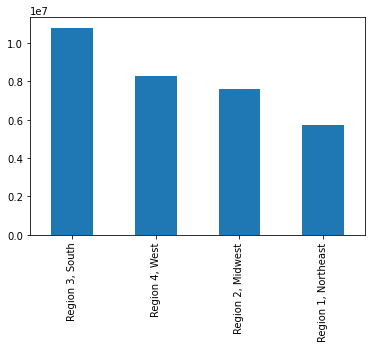

In [12]:
bar16 = df_complete['Region'].value_counts().plot.bar()

In [13]:
# Creating crosstab between Regions and Spender_Type
crosstab = pd.crosstab(df_complete['Region'], df_complete['Spender_type'], dropna = False)

In [14]:
crosstab

Spender_type,High_spender,Low_spender
Region,,
"Region 1, Northeast",108226,5614713
"Region 2, Midwest",155979,7441606
"Region 3, South",209693,10582607
"Region 4, West",160354,8132863


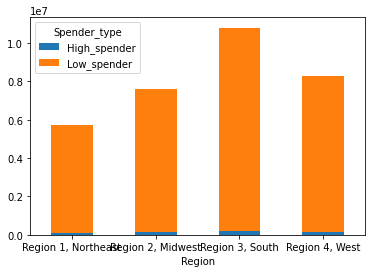

In [15]:
#plotting bar chart
spender_type_vs_region= crosstab.plot(kind="bar", stacked=True, rot=0)

In [16]:
# Creating crosstab between Regions and frequency flag
crosstab7 = pd.crosstab(df_complete['Region'], df_complete['Customer_frequency'], dropna = False)

In [17]:
#Viewing work
crosstab7

Customer_frequency,Frequent_customer,Non_frequent_customer,Regular_customer
Region,,,
"Region 1, Northeast",3804573,630210,1288156
"Region 2, Midwest",5017781,863531,1716273
"Region 3, South",7192610,1215183,2384502
"Region 4, West",5545360,927783,1820074


In [18]:
#creating a crosstabto show percentages
crosstab8 = pd.crosstab(df_complete['Region'], df_complete['Customer_frequency'], normalize='index')\
       .round(4)*100

In [19]:
#viewing work
crosstab8

Customer_frequency,Frequent_customer,Non_frequent_customer,Regular_customer
Region,,,
"Region 1, Northeast",66.48,11.01,22.51
"Region 2, Midwest",66.04,11.37,22.59
"Region 3, South",66.65,11.26,22.09
"Region 4, West",66.87,11.19,21.95


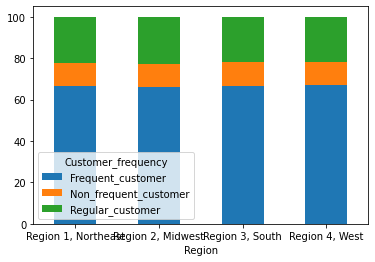

In [20]:
#plotting bar chart (stacked)
regionvsfreq= crosstab8.plot(kind="bar", stacked=True, rot=0)

In [21]:
#checking counts on spender type
df_complete['Spender_type'].value_counts(dropna = False)

Low_spender     31771789
High_spender      634252
Name: Spender_type, dtype: int64

In general the high spenders are an order of magnitude lower than the low-spenders. The South region has by far the highest amount of low spenders.

In [47]:
# Creating crosstab between Regions and frequency flag
crosstab25 = pd.crosstab(df_complete['Region'], df_complete['income_flag'], dropna = False)

In [48]:
#checking work
crosstab25

income_flag,Lower Middle Class,Middle Class,Poor or near poor,Wealthy
Region,,,,
"Region 1, Northeast",677944,4949431,85790,9774
"Region 2, Midwest",874681,6577810,125534,19560
"Region 3, South",1269264,9325052,183142,14842
"Region 4, West",942478,7206613,129314,14812


In [49]:
#Showing percentages of the avobe categories
crosstab26 = pd.crosstab(df_complete['Region'], df_complete['income_flag'], normalize='index')\
       .round(4)*100

In [50]:
#showing result
crosstab26

income_flag,Lower Middle Class,Middle Class,Poor or near poor,Wealthy
Region,,,,
"Region 1, Northeast",11.85,86.48,1.50,0.17
"Region 2, Midwest",11.51,86.58,1.65,0.26
"Region 3, South",11.76,86.40,1.70,0.14
"Region 4, West",11.36,86.90,1.56,0.18


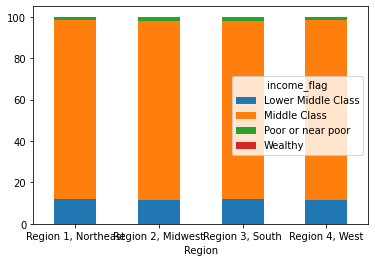

In [51]:
#plotting bar chart (stacked)
region_vs_income= crosstab26.plot(kind="bar", stacked=True, rot=0)

### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [24]:
# categorizing using loc (max_order <= 4)
df_complete.loc[(df_complete['max_order'] <= 4 ) , 'low_activity_flag'] = 'Low activity customer'

In [25]:
# categorizing using loc (max_order >= 5)
df_complete.loc[(df_complete['max_order'] >= 5 ) , 'low_activity_flag'] = 'Normal activity customer'

In [26]:
#checking categorization counts
df_complete['low_activity_flag'].value_counts(dropna = False)

Normal activity customer    30965686
Low activity customer        1440355
Name: low_activity_flag, dtype: int64

In [27]:
# Creating exclusion subset
df_complete_Normal_activity_cust =  df_complete[df_complete['low_activity_flag']=='Normal activity customer']

In [28]:
#checking categorization counts
df_complete_Normal_activity_cust ['low_activity_flag'].value_counts(dropna = False)

Normal activity customer    30965686
Name: low_activity_flag, dtype: int64

In [29]:
# Exporting this subset as a PKL file
df_complete_Normal_activity_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Normal_activity_customer_subset.pkl'))

### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [30]:
# dividing customers into age groups, Age range 18-35 = Young Adult, Age range 35-64 = Adult, Age range greater than 64 = Senior, to to divide ages of customers
df_complete.loc[(df_complete['Age'] >= 18) & (df_complete['Age'] <= 35), 'Age_Range'] = 'Young Adult'
df_complete.loc[(df_complete['Age'] > 35) & (df_complete['Age'] <= 64), 'Age_Range'] = 'Adult'
df_complete.loc[(df_complete['Age'] > 64), 'Age_Range'] = 'Seniors'
df_complete['Age_Range'].value_counts()   
 

Adult          14683931
Young Adult     9146749
Seniors         8575361
Name: Age_Range, dtype: int64

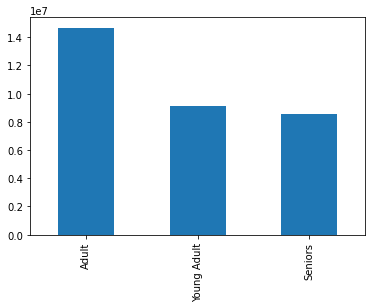

In [31]:
# Bar chart to show Age range division
bar20 = df_complete['Age_Range'].value_counts().plot.bar()

As shown above, the 18-35 age bracket has the highest customer count.

In [32]:
#Creating a crosstab to show the divisions in all age range categories across the regional divisions in the USA 
crosstab20 = pd.crosstab(df_complete['Age_Range'], df_complete['Region'], dropna = False)

In [38]:
#Looking at the crosstab
crosstab20

Region,"Region 1, Northeast","Region 2, Midwest","Region 3, South","Region 4, West"
Age_Range,,,,
Adult,2545634,3491850,4868780,3777667
Seniors,1553956,1990918,2836341,2194146
Young Adult,1623349,2114817,3087179,2321404


In [39]:
# Doing the same with percentages
crosstab21 = pd.crosstab(df_complete['Region'], df_complete['Age_Range'], normalize='index')\
       .round(4)*100

In [40]:
crosstab21

Age_Range,Adult,Seniors,Young Adult
Region,,,
"Region 1, Northeast",44.48,27.15,28.37
"Region 2, Midwest",45.96,26.20,27.84
"Region 3, South",45.11,26.28,28.61
"Region 4, West",45.55,26.46,27.99


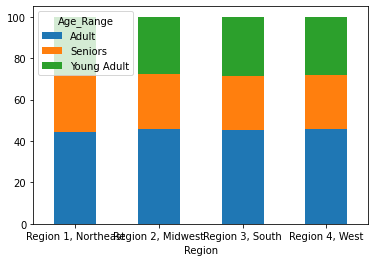

In [41]:
#plotting bar chart (stacked)
regionsvsagerange= crosstab21.plot(kind="bar", stacked=True, rot=0)

In [52]:
#Creating a crosstab to show the divisions in all age range categories across the income brackets
crosstab27 = pd.crosstab(df_complete['Age_Range'], df_complete['income_flag'], dropna = False)

In [53]:
#Creating a crosstab with percentages of the same information above
crosstab28 = pd.crosstab(df_complete['Age_Range'], df_complete['income_flag'], normalize='index')\
       .round(4)*100

In [54]:
crosstab28

income_flag,Lower Middle Class,Middle Class,Poor or near poor,Wealthy
Age_Range,,,,
Adult,9.95,88.59,1.23,0.23
Seniors,8.55,90.21,0.99,0.24
Young Adult,17.17,79.96,2.82,0.05


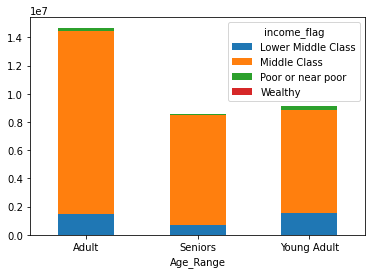

In [55]:
#plotting bar chart (stacked)
agerange_vs_class= crosstab27.plot(kind="bar", stacked=True, rot=0)

In [56]:
# Dividing time of day into its own categories; 12:00 am - 05:59 am = overnight, 06:00 - 11:59 morning, 12:00 pm - 04:59 pm = afternoon, 05:00 pm - 07:59 pm = evening,08:00 pm - 11:59 pm = night  
       
df_complete.loc[(df_complete['order_hour_of_day'] > 0) & (df_complete['order_hour_of_day'] < 6), 'time_of_day'] = 'overnight'
df_complete.loc[(df_complete['order_hour_of_day'] >= 6) & (df_complete['order_hour_of_day'] < 12), 'time_of_day'] = 'morning'
df_complete.loc[(df_complete['order_hour_of_day'] >= 12) & (df_complete['order_hour_of_day'] < 17), 'time_of_day'] = 'afternoon'
df_complete.loc[(df_complete['order_hour_of_day'] >= 17) & (df_complete['order_hour_of_day'] < 20), 'time_of_day'] = 'evening'
df_complete.loc[(df_complete['order_hour_of_day'] >= 20) & (df_complete['order_hour_of_day'] < 24), 'time_of_day'] = 'night'
df_complete['time_of_day'].value_counts()

afternoon    13166480
morning      10852141
evening       4982639
night         2808422
overnight      377573
Name: time_of_day, dtype: int64

In [44]:
# Dividing income into brackets; $32,048 or less "Poor or near-poor, $32,048-$53,413 Lower-middle class, $53,413-$106,827 Middle class, $106,827-373,894 Upper-middle class, $373,894 and up Wealthy
# creating income flags
df_complete.loc[df_complete['Income']<32048, 'income_flag'] = 'Poor or near poor'
df_complete.loc[(df_complete['Income']>=32048) & (df_complete['Income']<=53413), 'income_flag'] = 'Lower Middle Class' 
df_complete.loc[(df_complete['Income']>53413) & (df_complete['Income']<=106827), 'income_flag'] = 'Middle Class'
df_complete.loc[(df_complete['Income']>106827) & (df_complete['Income']<=373894), 'income_flag'] = 'Middle Class'
df_complete.loc[df_complete['Income']>373894, 'income_flag'] = 'Wealthy'
df_complete['income_flag'].value_counts(dropna = False)

Middle Class          28058906
Lower Middle Class     3764367
Poor or near poor       523780
Wealthy                  58988
Name: income_flag, dtype: int64

In [57]:
# Creating crosstab between income flag and age range
crosstab2 = pd.crosstab(df_complete['income_flag'], df_complete['Age_Range'], dropna = False)

In [58]:
crosstab2

Age_Range,Adult,Seniors,Young Adult
income_flag,,,
Lower Middle Class,1460499,733553,1570315
Middle Class,13009132,7735878,7313896
Poor or near poor,180486,85256,258038
Wealthy,33814,20674,4500


In [59]:
# Creating subsets of Age Range
df_Young_adults =  df_complete[df_complete['Age_Range']=='Young Adult']
df_Adults =  df_complete[df_complete['Age_Range']=='Adult']
df_Seniors =  df_complete[df_complete['Age_Range']=='Seniors']

### Create an appropriate visualization to show the distribution of profiles.

In [60]:
df_Young_adults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146749 entries, 91 to 32406025
Data columns (total 39 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   User_ID                        object  
 1   Gender                         object  
 2   State                          object  
 3   Age                            int64   
 4   Date_Joined                    object  
 5   Number_of_Dependants           int64   
 6   Family_Status                  object  
 7   Income                         int64   
 8   order_id                       int64   
 9   eval_set                       object  
 10  order_number                   int64   
 11  order_dow                      int64   
 12  order_hour_of_day              int64   
 13  days_since_prior_order         float64 
 14  product_id                     int64   
 15  add_to_cart_order              int64   
 16  reordered                      int64   
 17  _merge                   

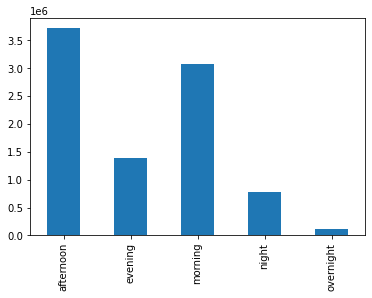

In [61]:
# creating bar chart of time of day in young adult category
bar1 = df_Young_adults['time_of_day'].value_counts().sort_index().plot.bar()

Young Adults place most of their orders in the morning and afternoon.

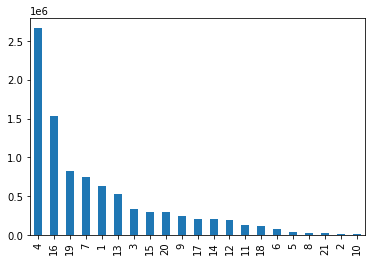

In [62]:
# creating bar chart of dep id in young adult category
bar2 = df_Young_adults['department_id'].value_counts().plot.bar()

Young adults order mostly from departments 4 and 16.

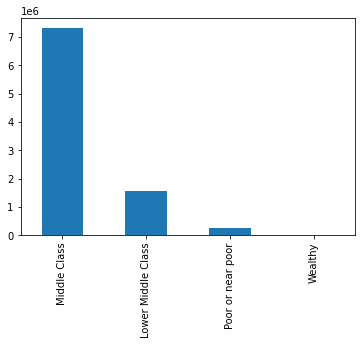

In [63]:
# creating bar chart of time of day in young adult category
bar3 = df_Young_adults['income_flag'].value_counts().plot.bar()

Young adults are mostly in the middle class income category

In [64]:
# Marking the above prices above 100 as missing
df_Young_adults.loc[df_Young_adults['prices'] >100, 'prices'] = np.nan

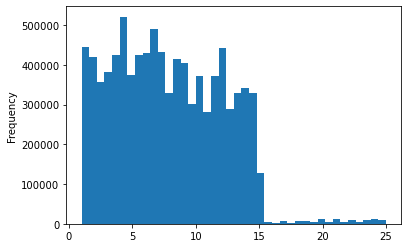

In [65]:
# Histogram young adult prices
hist1 = df_Young_adults['prices'].plot.hist(bins = 40)

Young adults tend to spend less than $15 per order

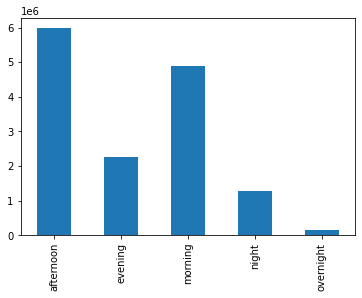

In [66]:
# creating bar chart of time of day in adult category
bar4 = df_Adults['time_of_day'].value_counts().sort_index().plot.bar()

Adults order mostly in the morning and afternoon

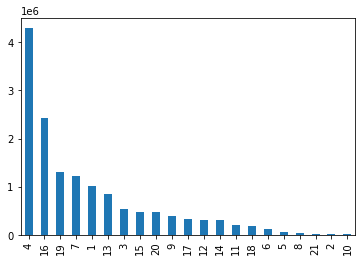

In [67]:
# creating bar chart of time of day in the adult category
bar5 = df_Adults['department_id'].value_counts().plot.bar()

Adults order mostly from departments 4 and 16.

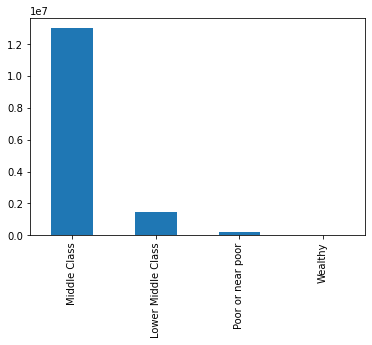

In [68]:
# creating bar chart of time of day in the adult category
bar6 = df_Adults['income_flag'].value_counts().plot.bar()

Adults are mostly middle class.

In [69]:
# Marking the above prices above 100 as missing
df_Adults.loc[df_Adults['prices'] >100, 'prices'] = np.nan

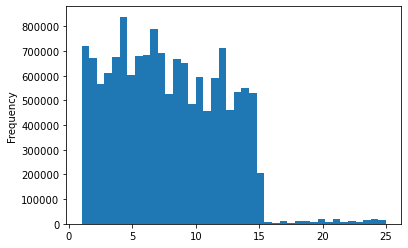

In [70]:
# histogram on what adults spend
hist2 = df_Adults['prices'].plot.hist(bins = 40)

Adults tend to spend less than 15 dollars per order.

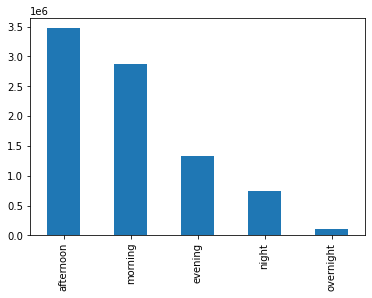

In [71]:
# creating bar chart of time of day in the senior category
bar7 = df_Seniors['time_of_day'].value_counts().plot.bar()

Seniors shop mostly in the morning and afternoon

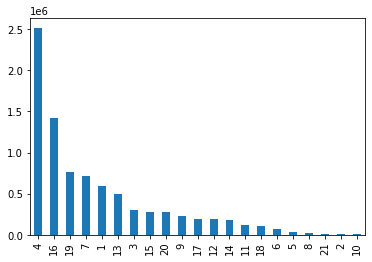

In [72]:
# creating bar chart of department id in the senior category
bar8 = df_Seniors['department_id'].value_counts().plot.bar()

Seniors order mostly from departments 4 and 16

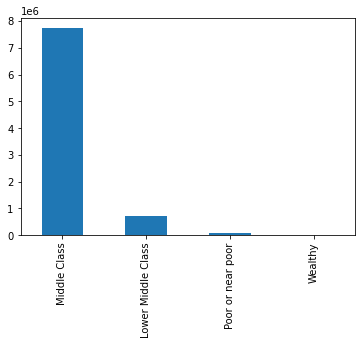

In [73]:
# creating bar chart of income flag in the senior
bar9 = df_Seniors['income_flag'].value_counts().plot.bar()

Seniors are mostly middle class

In [74]:
# Marking the above prices above 100 as missing
df_Seniors.loc[df_Seniors['prices'] >100, 'prices'] = np.nan

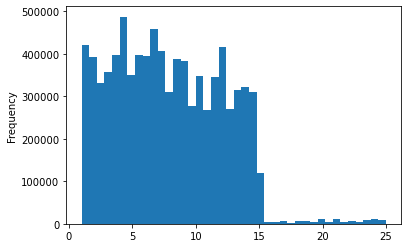

In [75]:
# histogram on what Seniors spend
hist3 = df_Seniors['prices'].plot.hist(bins = 40)

Seniors also tend to spend less than $15 per order.

In [ ]:
# Looking at the overall department ID data

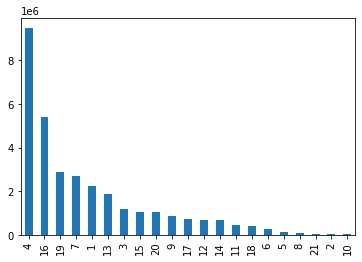

In [76]:
bar14 = df_complete['department_id'].value_counts().plot.bar()

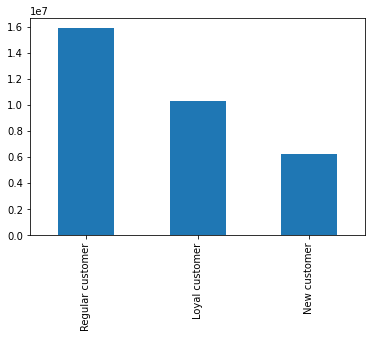

In [77]:
#Customer loyalty distribution
bar15 = df_complete['loyalty_flag'].value_counts().plot.bar()

In [78]:
#Showing counts of each category
df_complete['loyalty_flag'].value_counts()

Regular customer    15877395
Loyal customer      10284396
New customer         6244250
Name: loyalty_flag, dtype: int64

In [79]:
#calculating percentages of each category based on customer count
print('Regular Customer', round((15877395/(15877395+10284396+6244250))*100, 2),'%')
print('Loyal Customer ', round((10284396/(15877395+10284396+6244250))*100, 2),'%')
print('New Customer ', round((6244250/(15877395+10284396+6244250))*100, 2),'%')

Regular Customer 49.0 %
Loyal Customer  31.74 %
New Customer  19.27 %


In [80]:
#looking at customer frequency column counts 
df_complete['Customer_frequency'].value_counts()

Frequent_customer        21560324
Regular_customer          7209005
Non_frequent_customer     3636707
Name: Customer_frequency, dtype: int64

In [81]:
# Creating crosstab between loyalty flag and customer frequency
crosstab4 = pd.crosstab(df_complete['loyalty_flag'], df_complete['Customer_frequency'], dropna = False)

In [82]:
#showing crosstab
crosstab4

Customer_frequency,Frequent_customer,Non_frequent_customer,Regular_customer
loyalty_flag,,,
Loyal customer,10280263,0,4133
New customer,1648597,2725192,1870456
Regular customer,9631464,911515,5334416


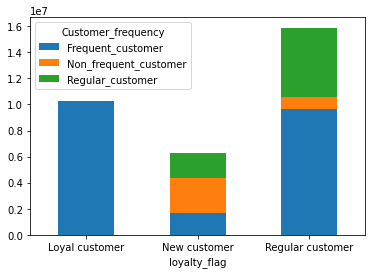

In [83]:
#plotting bar chart
loyalvsfreq= crosstab4.plot(kind="bar", stacked=True, rot=0)

In [84]:
#### viewing percentage of customers in each region based on class
print('Loyal:Frequent ', round(crosstab4.iloc[0,0]/10284396*100, 2),'%')
print('Loyal:Non Frequent ', round(crosstab4.iloc[0,1]/10284396*100, 2),'%')
print('Loyal:Regular ', round(crosstab4.iloc[0,2]/10284396*100, 2),'%')
print('New:Frequent ', round(crosstab4.iloc[1,0]/6244245*100, 2),'%')
print('New:Non Frequent ', round(crosstab4.iloc[1,1]/6244245*100, 2),'%')
print('New:Regular ', round(crosstab4.iloc[1,2]/6244245*100, 2),'%')
print('Regular:Frequent ', round(crosstab4.iloc[2,0]/15877395*100, 2),'%')
print('Regular:Non frequent ', round(crosstab4.iloc[2,1]/15877395*100, 2),'%')
print('Regular:Regular ', round(crosstab4.iloc[2,2]/15877395*100, 2),'%')


Loyal:Frequent  99.96 %
Loyal:Non Frequent  0.0 %
Loyal:Regular  0.04 %
New:Frequent  26.4 %
New:Non Frequent  43.64 %
New:Regular  29.95 %
Regular:Frequent  60.66 %
Regular:Non frequent  5.74 %
Regular:Regular  33.6 %


In [85]:
# Creating crosstab between loyalty flag and customer frequency
crosstab5 = pd.crosstab(df_complete['loyalty_flag'], df_complete['department_id'], normalize='index')\
       .round(4)*100

In [86]:
#showing crosstab
with pd.option_context("display.max_columns", None):
    display(crosstab5)


department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal customer,5.93,0.10,3.69,30.60,0.38,0.76,8.31,0.25,2.36,0.13,1.20,1.97,5.45,2.16,2.86,17.80,1.91,1.62,9.17,3.15,0.18
New customer,7.77,0.12,3.58,27.81,0.60,0.91,8.21,0.33,3.03,0.08,1.58,2.35,6.28,2.22,3.78,15.56,2.67,0.96,8.56,3.30,0.27
Regular customer,7.18,0.11,3.58,28.94,0.49,0.84,8.32,0.33,2.74,0.10,1.42,2.27,5.81,2.16,3.38,16.35,2.36,1.24,8.88,3.28,0.21


### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [87]:
#showing the 3 dataframes created
df_Young_adults.describe()

,Age,Number_of_Dependants,Income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,aisle_id,department_id,prices,max_order,Total_spent,Mean_prices,Median_days_since_prior_order
count,9.146749e+06,9.146749e+06,9.146749e+06,9.146749e+06,9.146749e+06,9.146749e+06,9.146749e+06,8.560419e+06,9.146749e+06,9.146749e+06,9.146749e+06,9.146749e+06,9.146749e+06,9.146749e+06,9.145272e+06,9.146749e+06,9.146749e+06,9.146749e+06,9.146749e+06
mean,2.650351e+01,1.504928e+00,7.049022e+04,1.711323e+06,1.710673e+01,2.730549e+00,1.340505e+01,1.112488e+01,2.558546e+04,8.408940e+00,5.895923e-01,2.558716e+04,7.120357e+01,9.937084e+00,7.785049e+00,3.298256e+01,3.736299e+02,1.212499e+01,1.041373e+01
std,5.192519e+00,1.118034e+00,2.521283e+04,9.875041e+05,1.747877e+01,2.088959e+00,4.248011e+00,8.771310e+00,1.407742e+04,7.187371e+00,4.919078e-01,1.407897e+04,3.822464e+01,6.284143e+00,4.238547e+00,2.508255e+01,4.244853e+03,9.380797e+01,7.117306e+00
min,1.800000e+01,0.000000e+00,2.591100e+04,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.200000e+01,1.000000e+00,5.593500e+04,8.564680e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.356000e+04,3.000000e+00,0.000000e+00,1.356000e+04,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,1.490000e+01,7.385799e+00,6.000000e+00
50%,2.700000e+01,2.000000e+00,6.903400e+04,1.710364e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.524600e+04,6.000000e+00,1.000000e+00,2.524700e+04,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,2.040000e+01,7.817197e+00,8.000000e+00
75%,3.100000e+01,3.000000e+00,8.463100e+04,2.566481e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.791700e+04,1.200000e+01,1.000000e+00,3.792100e+04,1.070000e+02,1.600000e+01,1.120000e+01,4.700000e+01,2.360000e+01,8.245455e+00,1.300000e+01
max,3.500000e+01,3.000000e+00,3.963640e+05,3.421077e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.090000e+02,1.000000e+00,4.969200e+04,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,9.999900e+04,1.250692e+04,3.000000e+01


In [88]:
df_Adults.describe()

,Age,Number_of_Dependants,Income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,aisle_id,department_id,prices,max_order,Total_spent,Mean_prices,Median_days_since_prior_order
count,1.468393e+07,1.468393e+07,1.468393e+07,1.468393e+07,1.468393e+07,1.468393e+07,1.468393e+07,1.374422e+07,1.468393e+07,1.468393e+07,1.468393e+07,1.468393e+07,1.468393e+07,1.468393e+07,1.468161e+07,1.468393e+07,1.468393e+07,1.468393e+07,1.468393e+07
mean,4.998812e+01,1.496480e+00,1.080369e+05,1.710713e+06,1.719010e+01,2.740410e+00,1.343687e+01,1.110601e+01,2.561026e+04,8.349046e+00,5.900622e-01,2.561197e+04,7.119512e+01,9.917204e+00,7.791397e+00,3.314722e+01,4.345933e+02,1.201317e+01,1.040853e+01
std,8.338068e+00,1.121271e+00,4.373032e+04,9.870741e+05,1.758854e+01,2.089626e+00,4.242435e+00,8.788346e+00,1.408594e+04,7.144163e+00,4.918219e-01,1.408749e+04,3.820393e+01,6.281267e+00,4.240830e+00,2.521192e+01,4.772418e+03,8.148155e+01,7.148196e+00
min,3.600000e+01,0.000000e+00,2.590300e+04,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,4.300000e+01,0.000000e+00,7.775900e+04,8.563820e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.355400e+04,3.000000e+00,0.000000e+00,1.355400e+04,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,1.490000e+01,7.384091e+00,6.000000e+00
50%,5.000000e+01,1.000000e+00,1.078480e+05,1.711836e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.534000e+04,6.000000e+00,1.000000e+00,2.534100e+04,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,2.040000e+01,7.825314e+00,8.000000e+00
75%,5.700000e+01,3.000000e+00,1.375860e+05,2.565052e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.797100e+04,1.100000e+01,1.000000e+00,3.797500e+04,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,2.360000e+01,8.254801e+00,1.300000e+01
max,6.400000e+01,3.000000e+00,5.924090e+05,3.421081e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,4.969200e+04,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,9.999900e+04,2.500542e+04,3.000000e+01


In [89]:
df_Seniors.describe()

,Age,Number_of_Dependants,Income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,aisle_id,department_id,prices,max_order,Total_spent,Mean_prices,Median_days_since_prior_order
count,8.575361e+06,8.575361e+06,8.575361e+06,8.575361e+06,8.575361e+06,8.575361e+06,8.575361e+06,8.025203e+06,8.575361e+06,8.575361e+06,8.575361e+06,8.575361e+06,8.575361e+06,8.575361e+06,8.574028e+06,8.575361e+06,8.575361e+06,8.575361e+06,8.575361e+06
mean,7.306163e+01,1.507916e+00,1.155889e+05,1.710184e+06,1.709813e+01,2.745079e+00,1.342652e+01,1.107867e+01,2.559396e+04,8.298650e+00,5.887582e-01,2.559567e+04,7.119596e+01,9.906273e+00,7.796523e+00,3.296313e+01,4.136583e+02,1.176870e+01,1.036279e+01
std,4.888693e+00,1.115583e+00,4.209503e+04,9.874635e+05,1.750384e+01,2.092003e+00,4.251319e+00,8.771352e+00,1.408725e+04,7.032323e+00,4.920590e-01,1.408880e+04,3.821167e+01,6.278727e+00,4.246689e+00,2.513470e+01,4.707412e+03,7.368417e+01,7.118881e+00
min,6.500000e+01,0.000000e+00,2.900100e+04,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,6.900000e+01,1.000000e+00,9.540600e+04,8.544680e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.353500e+04,3.000000e+00,0.000000e+00,1.353500e+04,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,1.490000e+01,7.393458e+00,6.000000e+00
50%,7.300000e+01,2.000000e+00,1.160590e+05,1.710558e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.527200e+04,6.000000e+00,1.000000e+00,2.527300e+04,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,2.010000e+01,7.830374e+00,8.000000e+00
75%,7.700000e+01,3.000000e+00,1.431900e+05,2.565092e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,3.795100e+04,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,2.360000e+01,8.262373e+00,1.300000e+01
max,8.100000e+01,3.000000e+00,5.939010e+05,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,9.900000e+01,1.000000e+00,4.969200e+04,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,9.999900e+04,1.404251e+04,3.000000e+01


In general age group to age group comparisons tend to show little to no differnece in when they shop, what departments they order from, thier income category, and how much they spend.

In [90]:
# creating a new dataframe that summarizes the data by region
df_region = df_complete[['prices', 'Region', 'User_ID', 'order_id']].groupby(['Region']).agg({'prices':'sum', 'User_ID': pd.Series.nunique, 'order_id' : pd.Series.nunique}) 

In [91]:
# Checking work
df_region

,prices,User_ID,order_id
Region,,,
"Region 1, Northeast",66127653.2,36388,567162
"Region 2, Midwest",96605425.4,48519,754275
"Region 3, South",131616125.5,68737,1071562
"Region 4, West",93876474.9,52565,821686


In [92]:
# renaming columns
df_region = df_region.rename(columns={'prices':'sum_of_sales', 'User_ID':'customer_count', 'order_id':'orders_placed'})

In [93]:
# Checking work
df_region

,sum_of_sales,customer_count,orders_placed
Region,,,
"Region 1, Northeast",66127653.2,36388,567162
"Region 2, Midwest",96605425.4,48519,754275
"Region 3, South",131616125.5,68737,1071562
"Region 4, West",93876474.9,52565,821686


In [94]:
# creating new column: average price per customer
df_region['avg_price_per_customer'] = df_region['sum_of_sales']/df_region['customer_count']

In [95]:
# creating new column: average orders placed by customer
df_region['avg_orders_per_customer'] = df_region['orders_placed']/df_region['customer_count']

In [96]:
# creating new column: average price per order
df_region['avg_price_per_order'] = df_region['sum_of_sales']/df_region['orders_placed'] 

In [97]:
# Checking work
df_region

,sum_of_sales,customer_count,orders_placed,avg_price_per_customer,avg_orders_per_customer,avg_price_per_order
Region,,,,,,
"Region 1, Northeast",66127653.2,36388,567162,1817.292877,15.586512,116.593942
"Region 2, Midwest",96605425.4,48519,754275,1991.084429,15.545972,128.077194
"Region 3, South",131616125.5,68737,1071562,1914.778438,15.589304,122.826421
"Region 4, West",93876474.9,52565,821686,1785.912202,15.631808,114.248600


In [98]:
# sorting data by price per customer 
df_region.sort_values(by='avg_price_per_customer', ascending=False)

,sum_of_sales,customer_count,orders_placed,avg_price_per_customer,avg_orders_per_customer,avg_price_per_order
Region,,,,,,
"Region 2, Midwest",96605425.4,48519,754275,1991.084429,15.545972,128.077194
"Region 3, South",131616125.5,68737,1071562,1914.778438,15.589304,122.826421
"Region 1, Northeast",66127653.2,36388,567162,1817.292877,15.586512,116.593942
"Region 4, West",93876474.9,52565,821686,1785.912202,15.631808,114.248600


The Midwest comes out as the highest price per customer.

### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [99]:
# Creating crosstab between region and income flag
crosstab3 = pd.crosstab(df_complete['Region'], df_complete['income_flag'], dropna = False)

In [100]:
crosstab3

income_flag,Lower Middle Class,Middle Class,Poor or near poor,Wealthy
Region,,,,
"Region 1, Northeast",677944,4949431,85790,9774
"Region 2, Midwest",874681,6577810,125534,19560
"Region 3, South",1269264,9325052,183142,14842
"Region 4, West",942478,7206613,129314,14812


In [101]:
#### viewing percentage of customers in each region based on class
print('midwest:Lower middle class ', round(crosstab3.iloc[0,0]/5722939*100, 2),'%')
print('midwest:Middle class ', round(crosstab3.iloc[0,1]/5722939*100, 2),'%')
print('midwest:Poor or near poor ', round(crosstab3.iloc[0,2]/5722939*100, 2),'%')
print('midwest:Wealthy ', round(crosstab3.iloc[0,3]/5722939*100, 2),'%')
print('northeast:Lower middle class ', round(crosstab3.iloc[1,0]/7597585*100, 2),'%')
print('northeast:Middle Class ', round(crosstab3.iloc[1,1]/7597585*100, 2),'%')
print('northeast:Poor or near poor ', round(crosstab3.iloc[1,2]/7597585*100, 2),'%')
print('northeast:Wealthy ', round(crosstab3.iloc[1,3]/7597585*100, 2),'%')
print('south:Lower middle class ', round(crosstab3.iloc[2,0]/10792300*100, 2),'%')
print('south:Middle Class ', round(crosstab3.iloc[2,1]/10792300*100, 2),'%')
print('south:Poor or near poor ', round(crosstab3.iloc[2,2]/10792300*100, 2),'%')
print('south:Wealthy ', round(crosstab3.iloc[2,3]/10792300*100, 2),'%')
print('west:Lower middle class ', round(crosstab3.iloc[3,0]/8293217*100, 2),'%')
print('west:Middle Class ', round(crosstab3.iloc[3,1]/8293217*100, 2),'%')
print('west:Poor or near poor ', round(crosstab3.iloc[3,2]/8293217*100, 2),'%')
print('west:Wealthy ', round(crosstab3.iloc[3,3]/8293217*100, 2),'%')



midwest:Lower middle class  11.85 %
midwest:Middle class  86.48 %
midwest:Poor or near poor  1.5 %
midwest:Wealthy  0.17 %
northeast:Lower middle class  11.51 %
northeast:Middle Class  86.58 %
northeast:Poor or near poor  1.65 %
northeast:Wealthy  0.26 %
south:Lower middle class  11.76 %
south:Middle Class  86.4 %
south:Poor or near poor  1.7 %
south:Wealthy  0.14 %
west:Lower middle class  11.36 %
west:Middle Class  86.9 %
west:Poor or near poor  1.56 %
west:Wealthy  0.18 %


The division of wealth is pretty even across the regions in the USA for the customer base

In [102]:
# Creating crosstab between region and order time of day
crosstab4 = pd.crosstab(df_complete['Region'], df_complete['time_of_day'], dropna = False)

In [103]:
crosstab4

time_of_day,afternoon,evening,morning,night,overnight
Region,,,,,
"Region 1, Northeast",2330393,872835,1912725,500327,68100
"Region 2, Midwest",3081839,1176774,2535089,664329,88805
"Region 3, South",4364848,1662075,3631130,934806,126135
"Region 4, West",3389400,1270955,2773197,708960,94533


In [104]:
#### viewing percentage of customers in each region based on class
print('midwest:afternoon ', round(crosstab4.iloc[0,0]/(crosstab4.iloc[0,0]+crosstab4.iloc[0,1]+crosstab4.iloc[0,2]+crosstab4.iloc[0,3]+crosstab4.iloc[0,4])*100, 2),'%')
print('midwest:evening ', round(crosstab4.iloc[0,1]/(crosstab4.iloc[0,0]+crosstab4.iloc[0,1]+crosstab4.iloc[0,2]+crosstab4.iloc[0,3]+crosstab4.iloc[0,4])*100, 2),'%')
print('midwest:morning ', round(crosstab4.iloc[0,2]/(crosstab4.iloc[0,0]+crosstab4.iloc[0,1]+crosstab4.iloc[0,2]+crosstab4.iloc[0,3]+crosstab4.iloc[0,4])*100, 2),'%')
print('midwest:night ', round(crosstab4.iloc[0,3]/(crosstab4.iloc[0,0]+crosstab4.iloc[0,1]+crosstab4.iloc[0,2]+crosstab4.iloc[0,3]+crosstab4.iloc[0,4])*100, 2),'%')
print('midwest:overnight ', round(crosstab4.iloc[0,4]/(crosstab4.iloc[0,0]+crosstab4.iloc[0,1]+crosstab4.iloc[0,2]+crosstab4.iloc[0,3]+crosstab4.iloc[0,4])*100, 2),'%')
print('northeast:afternoon ', round(crosstab4.iloc[1,0]/7546836*100, 2),'%')
print('northeast:evening ', round(crosstab4.iloc[1,1]/7546836*100, 2),'%')
print('northeast:morning ', round(crosstab4.iloc[1,2]/7546836*100, 2),'%')
print('northeast:night ', round(crosstab4.iloc[1,3]/7546836*100, 2),'%')
print('northeast:overnight ', round(crosstab4.iloc[1,4]/7546836*100, 2),'%')
print('south:afternoon ', round(crosstab4.iloc[2,0]/10718994*100, 2),'%')
print('south:evening ', round(crosstab4.iloc[2,1]/10718994*100, 2),'%')
print('south:morning ', round(crosstab4.iloc[2,2]/10718994*100, 2),'%')
print('south:night ', round(crosstab4.iloc[2,3]/10718994*100, 2),'%')
print('south:overnight ', round(crosstab4.iloc[2,4]/10718994*100, 2),'%')
print('west:afternoon ', round(crosstab4.iloc[3,0]/8237045*100, 2),'%')
print('west:evening ', round(crosstab4.iloc[3,1]/8237045*100, 2),'%')
print('west:morning ', round(crosstab4.iloc[3,2]/8237045*100, 2),'%')
print('west:night ', round(crosstab4.iloc[3,3]/8237045*100, 2),'%')
print('west:overnight ', round(crosstab4.iloc[3,4]/8237045*100, 2),'%')

midwest:afternoon  41.0 %
midwest:evening  15.35 %
midwest:morning  33.65 %
midwest:night  8.8 %
midwest:overnight  1.2 %
northeast:afternoon  40.84 %
northeast:evening  15.59 %
northeast:morning  33.59 %
northeast:night  8.8 %
northeast:overnight  1.18 %
south:afternoon  40.72 %
south:evening  15.51 %
south:morning  33.88 %
south:night  8.72 %
south:overnight  1.18 %
west:afternoon  41.15 %
west:evening  15.43 %
west:morning  33.67 %
west:night  8.61 %
west:overnight  1.15 %


Again we see very similar time of day orders across all regions

In [105]:
# Creating subsets by USA region
df_Northeast =  df_complete[df_complete['Region']=='Region 1, Northeast']
df_Midwest =  df_complete[df_complete['Region']=='Region 2, Midwest']
df_South =  df_complete[df_complete['Region']=='Region 3, South']
df_West =  df_complete[df_complete['Region']=='Region 4, West']

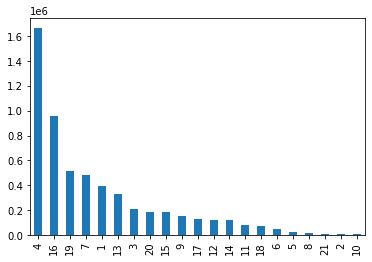

In [106]:
# creating bar chart of northeast department orders
bar10 = df_Northeast['department_id'].value_counts().plot.bar()

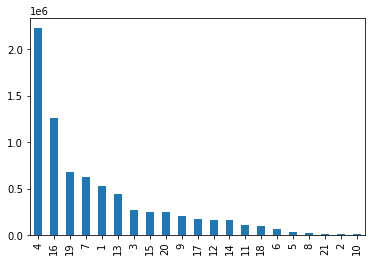

In [107]:
# creating bar chart of midwest department orders
bar11 = df_Midwest['department_id'].value_counts().plot.bar()

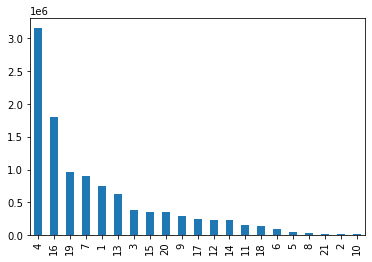

In [108]:
# creating bar chart of South department orders
bar12 = df_South['department_id'].value_counts().plot.bar()

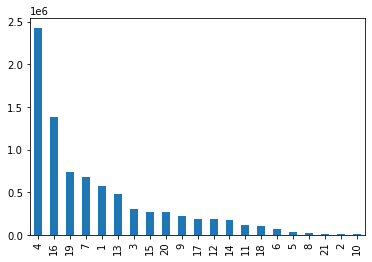

In [109]:
# creating bar chart of West department orders
bar13 = df_West['department_id'].value_counts().plot.bar()

Again, the regions seem to show the same general favorite departments to order from.

In [110]:
# Marking the above prices above 15000 as missing
df_Northeast.loc[df_Northeast['Total_spent'] >15000, 'Total_spent'] = np.nan

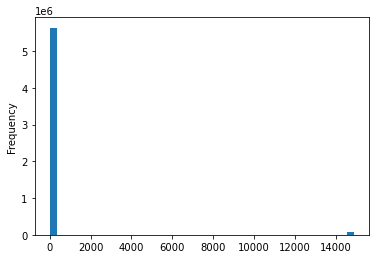

In [111]:
# histogram on what the northeast spends
hist4 = df_Northeast['Total_spent'].plot.hist(bins = 40)

In [112]:
# Marking the above prices above 15000 as missing
df_Midwest.loc[df_Midwest['Total_spent'] >2000, 'Total_spent'] = np.nan

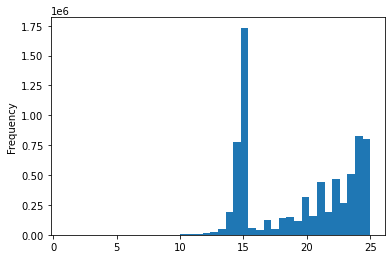

In [113]:
# histogram on what the Midwest spends
hist5 = df_Midwest['Total_spent'].plot.hist(bins = 40)

In [114]:
# Marking the above prices above 2000 as missing
df_South.loc[df_South['Total_spent'] >2000, 'Total_spent'] = np.nan

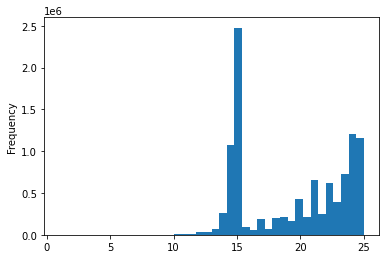

In [115]:
# histogram on what the northeast spends
hist6 = df_South['Total_spent'].plot.hist(bins = 40)

In [116]:
# Marking the above prices above 2000 as missing
df_West.loc[df_West['Total_spent'] >2000, 'Total_spent'] = np.nan

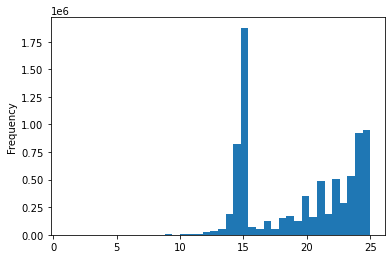

In [117]:
# histogram on what the West spends
hist7 = df_West['Total_spent'].plot.hist(bins = 40)

Again, we do not see any differences betweenthe regions when it comes to how much they spend

In [118]:
# Taking a look at family status, crossing region with family status
# Creating crosstab between loyalty flag and customer frequency
Regioncrossfamstatus = pd.crosstab(df_complete['Region'], df_complete['Family_Status'], dropna = False)


In [119]:
#Show cross
Regioncrossfamstatus

Family_Status,divorced/widowed,living with parents and siblings,married,single
Region,,,,
"Region 1, Northeast",501081,268118,4036448,917292
"Region 2, Midwest",646425,366529,5325780,1258851
"Region 3, South",920884,529601,7560929,1780886
"Region 4, West",703535,386393,5834384,1368905


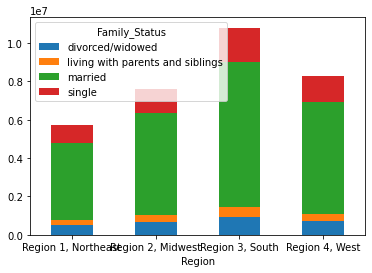

In [120]:
Regionvsfamstat= Regioncrossfamstatus.plot(kind="bar", stacked=True, rot=0)

In [121]:
# Creating crosstab between loyalty flag and customer frequency
Regionfamstatpercent = pd.crosstab(df_complete['Region'], df_complete['Family_Status'], normalize='index')\
       .round(4)*100

In [122]:
#Viewing poercentages
Regionfamstatpercent

Family_Status,divorced/widowed,living with parents and siblings,married,single
Region,,,,
"Region 1, Northeast",8.76,4.68,70.53,16.03
"Region 2, Midwest",8.51,4.82,70.10,16.57
"Region 3, South",8.53,4.91,70.06,16.50
"Region 4, West",8.48,4.66,70.35,16.51


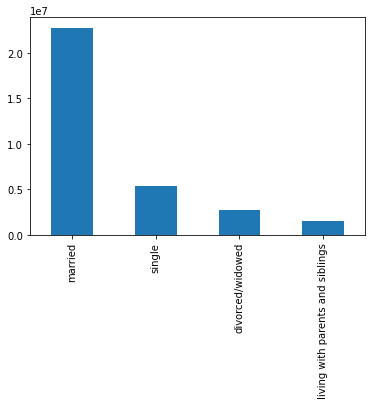

In [123]:
#Looking at family status as a whole
bar29 = df_complete['Family_Status'].value_counts().plot.bar()

In [124]:
#Crossing customer frequency with age group
FrequencyVSAG = pd.crosstab(df_complete['Age_Range'], df_complete['Customer_frequency'], dropna = False)

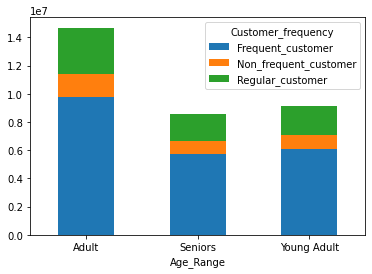

In [125]:
# Printing chart of above cross 
Frequencyvsagchart= FrequencyVSAG.plot(kind="bar", stacked=True, rot=0)

In [126]:
# Creating crosstab between loyalty flag and customer frequency
Frequencyvsagpercent = pd.crosstab(df_complete['Age_Range'], df_complete['Customer_frequency'], normalize='index')\
       .round(4)*100

In [127]:
#Showing work
Frequencyvsagpercent

Customer_frequency,Frequent_customer,Non_frequent_customer,Regular_customer
Age_Range,,,
Adult,66.47,11.30,22.24
Seniors,66.81,11.10,22.10
Young Adult,66.38,11.22,22.40


In [130]:
# Creating crosstab between age range and department id
agevsdep = pd.crosstab(df_complete['Age_Range'], df_complete['department_id'], normalize='index')\
       .round(4)*100

In [131]:
#showing crosstab
with pd.option_context("display.max_columns", None):
    display(agevsdep)

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Age_Range,,,,,,,,,,,,,,,,,,,,,
Adult,6.89,0.11,3.62,29.26,0.48,0.83,8.33,0.30,2.67,0.10,1.40,2.18,5.78,2.17,3.29,16.61,2.28,1.34,8.91,3.24,0.21
Seniors,6.92,0.11,3.61,29.31,0.46,0.83,8.34,0.31,2.67,0.11,1.37,2.22,5.80,2.15,3.29,16.63,2.30,1.28,8.87,3.24,0.21
Young Adult,6.88,0.11,3.63,29.18,0.49,0.84,8.20,0.30,2.68,0.11,1.37,2.18,5.78,2.20,3.31,16.77,2.26,1.28,8.96,3.25,0.22


In [134]:
# Crossing age range with family status
AgerngVSfamstat = pd.crosstab(df_complete['Age_Range'], df_complete['Family_Status'], dropna = False)

In [135]:
# Finding percentages of above
AgerngVSfamstatpercent = pd.crosstab(df_complete['Age_Range'], df_complete['Family_Status'], normalize='index')\
       .round(4)*100

In [136]:
# Checking work
AgerngVSfamstatpercent

Family_Status,divorced/widowed,living with parents and siblings,married,single
Age_Range,,,,
Adult,4.44,0.00,74.79,20.77
Seniors,24.72,0.00,75.28,0.00
Young Adult,0.00,16.95,58.16,24.89


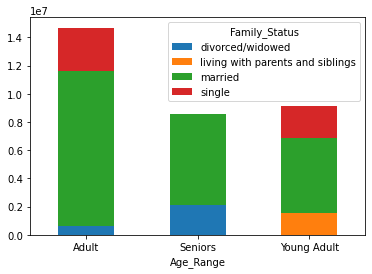

In [137]:
# Printing chart of above cross 
AgerngVSfamstatbar= AgerngVSfamstat.plot(kind="bar", stacked=True, rot=0)

In [138]:
#Double checking value counts

df_complete['income_flag'].value_counts(dropna = False)

Middle Class          28058906
Lower Middle Class     3764367
Poor or near poor       523780
Wealthy                  58988
Name: income_flag, dtype: int64

In [139]:
df_complete['Age_Range'].value_counts(dropna = False)

Adult          14683931
Young Adult     9146749
Seniors         8575361
Name: Age_Range, dtype: int64

In [140]:
df_complete['Region'].value_counts(dropna = False)

Region 3, South        10792300
Region 4, West          8293217
Region 2, Midwest       7597585
Region 1, Northeast     5722939
Name: Region, dtype: int64

In [142]:
df_complete['low_activity_flag'].value_counts(dropna = False)

Normal activity customer    30965686
Low activity customer        1440355
Name: low_activity_flag, dtype: int64

In [143]:
df_complete['Spender_type'].value_counts(dropna = False)

Low_spender     31771789
High_spender      634252
Name: Spender_type, dtype: int64

In [144]:
df_complete['loyalty_flag'].value_counts(dropna = False)

Regular customer    15877395
Loyal customer      10284396
New customer         6244250
Name: loyalty_flag, dtype: int64

In [146]:
df_complete['busiest_days'].value_counts(dropna = False)

Regularly busy    22360936
Busiest days       6204404
Slowest days       3840701
Name: busiest_days, dtype: int64

In [147]:
df_complete['busiest_day'].value_counts(dropna = False)

Regularly busy    22417684
Busiest day        6204404
Least busy         3783953
Name: busiest_day, dtype: int64

In [148]:
df_complete['price_range_loc'].value_counts(dropna = False)

Mid-range product     21861997
Low-range product     10126366
High-range product      417678
Name: price_range_loc, dtype: int64

In [92]:
# Export data to pkl

df_region.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_region.pkl'))

df_Young_adults.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Young_Adults.pkl'))

df_Adults.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Adults.pkl'))

df_Seniors.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Seniors.pkl'))

df_complete.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Final_full_combined'))

In [139]:
# Exporting visualizations
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Young_adult_TOD.png'))
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Young_adult_dept_ID.png'))
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Young_adult_income.png'))
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Young_adult_prices.png'))
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Adult_TOD.png'))
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Adult_Dept_ID.png'))
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Adult_income.png'))
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Adult_prices.png'))
bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Senior_TOD.png'))
bar8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Senior_Dept_ID.png'))
bar9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Senior_income.png'))
hist3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Senior_prices.png'))
bar10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Northeast_DEP_ID.png'))
bar11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Midwest_DEP_ID.png'))
bar12.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'South_DEP_ID.png'))
bar13.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'West_DEP_ID.png'))
hist4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Northeast_TOT_spent.png'))
hist5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Midwest_TOT_Spent.png'))
hist6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'South_TOT_Spent.png'))
hist7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'West_TOT_Spent.png'))
